In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
image_as_array = mpimg.imread('../DATA/palm_trees.jpg')

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

In [4]:
image_as_array.shape # (H, W, C)

(1401, 934, 3)

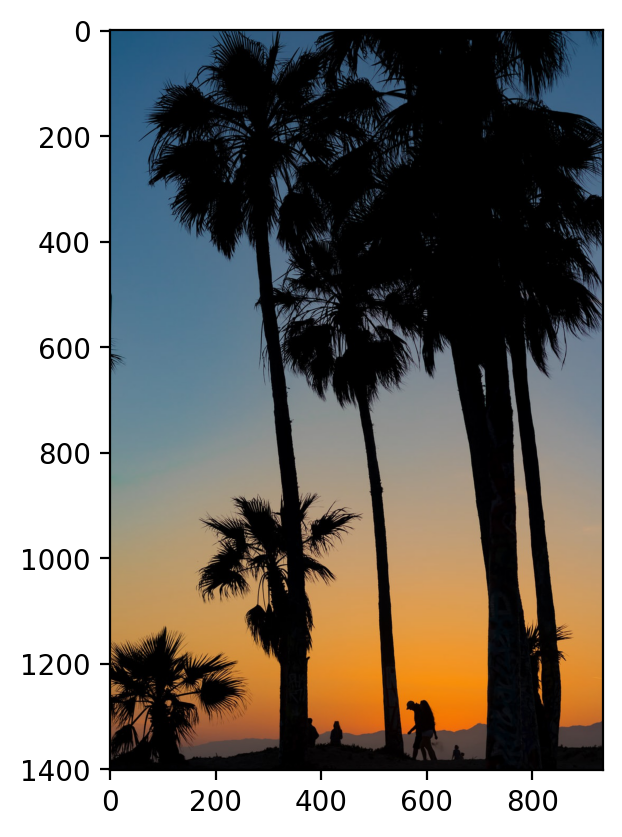

In [7]:
plt.figure(dpi=200)
plt.imshow(image_as_array);

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [8]:
# (H,W,C) --> 2D (H*W,C)
(h, w, c) = image_as_array.shape

In [9]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [10]:
len(image_as_array.shape)

3

In [11]:
len(image_as_array2d.shape)

2

In [12]:
from sklearn.cluster import KMeans

In [15]:
model = KMeans(n_clusters=6,n_init="auto")

In [16]:
labels = model.fit_predict(image_as_array2d)

In [17]:
labels

array([4, 4, 4, ..., 1, 1, 1], dtype=int32)

In [21]:
# THESE ARE THE 6 RGB COLOR CODES!
model.cluster_centers_

array([[191.45660313, 154.52547084, 109.63137723],
       [  2.75659154,   2.57529968,   3.70012508],
       [136.73533325, 143.74401484, 143.9844705 ],
       [219.02710886, 135.42650506,  47.00342746],
       [ 71.12526864, 109.27679682, 137.69417556],
       [ 67.25337203,  61.54496264,  62.01242432]])

In [19]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [20]:
rgb_codes

array([[191, 155, 110],
       [  3,   3,   4],
       [137, 144, 144],
       [219, 135,  47],
       [ 71, 109, 138],
       [ 67,  62,  62]])

In [23]:
quantized_image = np.reshape(rgb_codes[labels], (h,w,c))

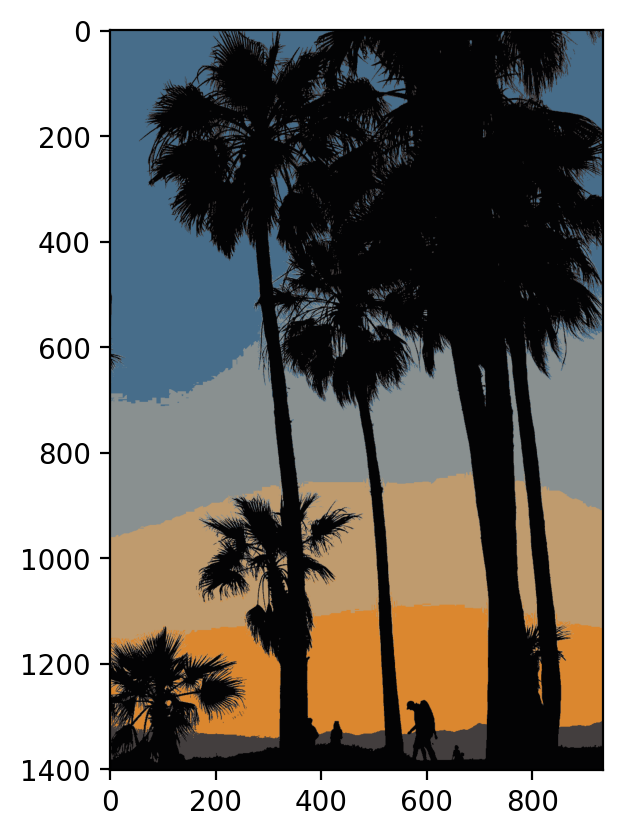

In [25]:
plt.figure(dpi=200)
plt.imshow(quantized_image);